# Compare Solutions - Homogenous

Brendan Smithyman | October 2015

This notebook shows comparisons between the responses of the different solvers.

In [1]:
import numpy as np
from anemoi import MiniZephyr, SimpleSource, AnalyticalHelmholtz

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [3]:
systemConfig = {
    'dx':       1.,     # m
    'dz':       1.,     # m
    'c':        2500.,  # m/s
    'rho':      1.,     # kg/m^3
    'nx':       100,    # count
    'nz':       200,    # count
    'freq':     2e2,    # Hz
}

nx = systemConfig['nx']
nz = systemConfig['nz']
dx = systemConfig['dx']
dz = systemConfig['dz']

In [4]:
MZ = MiniZephyr(systemConfig)
AH = AnalyticalHelmholtz(systemConfig)
SS = SimpleSource(systemConfig)

xs, zs = 25, 25

q = SS(xs, zs)
uMZ = MZ*q
uAH = AH(xs, zs)

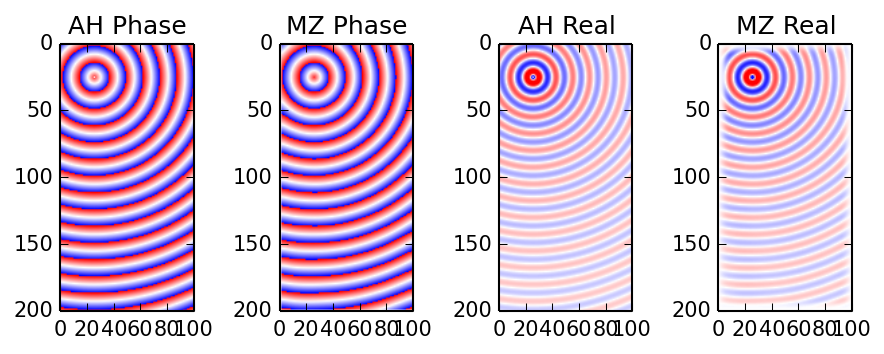

In [5]:
clip = 0.1

plotopts = {
    'vmin':     -np.pi,
    'vmax':     np.pi,
    'extent':   [0., dx * nx, dz * nz, 0.],
    'cmap':     cm.bwr,                
}

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
plt.imshow(np.angle(uAH.reshape((nz, nx))), **plotopts)
plt.title('AH Phase')

ax2 = fig.add_subplot(1,4,2)
plt.imshow(np.angle(uMZ.reshape((nz, nx))), **plotopts)
plt.title('MZ Phase')

plotopts.update({
    'vmin':     -clip,
    'vmax':     clip,
})

ax3 = fig.add_subplot(1,4,3)
plt.imshow(uAH.reshape((nz, nx)).real, **plotopts)
plt.title('AH Real')

ax4 = fig.add_subplot(1,4,4)
plt.imshow(uMZ.reshape((nz, nx)).real, **plotopts)
plt.title('MZ Real')

fig.tight_layout()

## Error plots for MiniZephyr vs. the AnalyticalHelmholtz response

Response of the field (showing where the numerical case does not match the analytical case):

- Source region
- PML regions

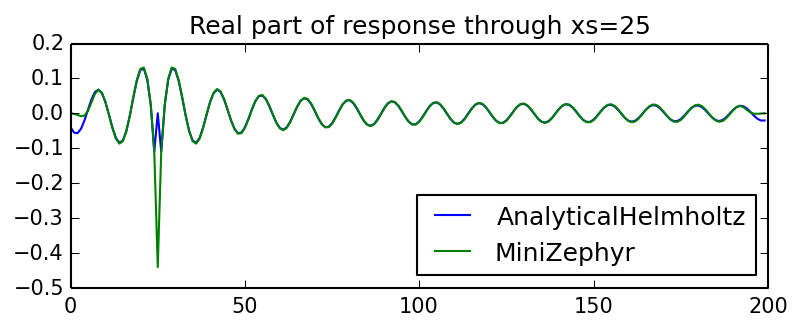

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, aspect=100)

plt.plot(uAH.real.reshape((nz, nx))[:,xs], label='AnalyticalHelmholtz')
plt.plot(uMZ.real.reshape((nz, nx))[:,xs], label='MiniZephyr')
plt.legend(loc=4)
plt.title('Real part of response through xs=%d'%xs)

### Relative error of the MiniZephyr solution (in %)

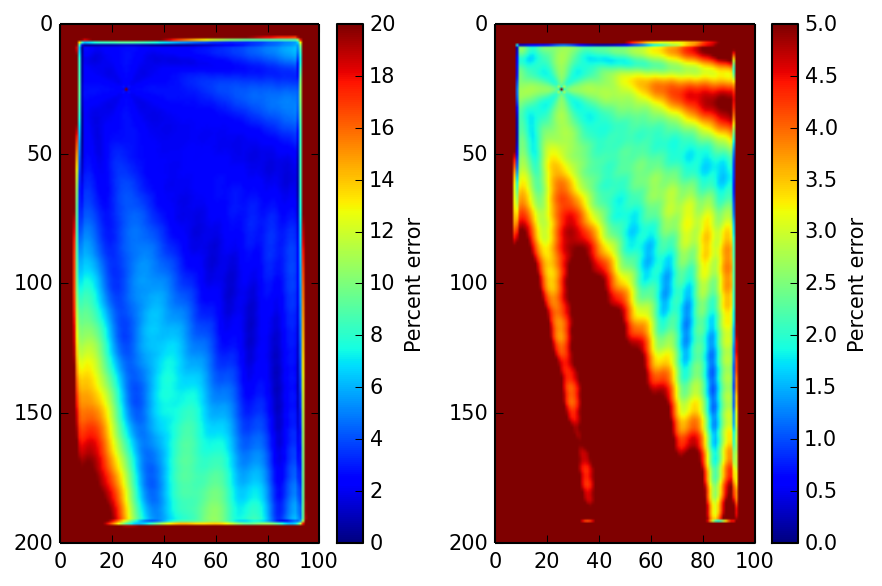

In [7]:
uMZr = uMZ.reshape((nz, nx))
uAHr = uAH.reshape((nz, nx))

plotopts.update({
    'cmap': cm.jet,
    'vmin': 0.,
    'vmax': 20.,
})

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
plt.imshow(abs(uAHr - uMZr)/(abs(uAHr)+1e-15) * 100, **plotopts)
cb = plt.colorbar()
cb.set_label('Percent error')

plotopts.update({'vmax': 5.})

ax2 = fig.add_subplot(1,2,2)
plt.imshow(abs(uAHr - uMZr)/(abs(uAHr)+1e-15) * 100, **plotopts)
cb = plt.colorbar()
cb.set_label('Percent error')

fig.tight_layout()